In [8]:
import pandas as pd
import plotly.express as px

In [9]:
raw_df = pd.read_excel('sample_data.xlsx', sheet_name = 'full_menu')

In [22]:
# plot category
def plot_cat(file_name, sheet_name, category):
    
    # load data
    data = pd.read_excel(file_name, sheet_name)    
    
    # filter category
    df = data[data['menu_category'] == category]
    
    popularity_threshold = round((1 / len(df)) * .7, 4)
    profitability_threshold = round(df.gross_profit.sum() / df.sales_volume.sum(), 2)  
    
    # Category order and colors
    matrix_order = ['Star', 'Work-Horse', 'Puzzle', 'Dog']
    color_map = {
        'Star': 'gold',
        'Workhorse': 'lightblue',
        'Puzzle': 'green',
        'Dog': 'red'
    }
    
    # Figure
    fig = px.scatter(df, x='contribution_margin', y='sales_mix', color='rank', size='gross_profit', text='menu_item',
                     category_orders={'rank': matrix_order}, color_discrete_map=color_map,
                     height=800, width=1600, template='plotly_white')
    
    # Titles
    # if category == 'King of Wings':
        # wings_threshold = df['contribution_margin'].median()
        # fig.update_layout(title=f'Popularity vs Profitability - {category} Category', xaxis_title=f'Profitability (Contribution Margin = {"¥{:.2f}".format(wings_threshold)})', yaxis_title=f'Popularity (Sales Mix % - {"{:.0%}".format(popularity_threshold)})')
    # else:
    fig.update_layout(title=f'Popularity vs Profitability - {category} Category', xaxis_title=f'Profitability (Contribution Margin = {"¥{:.2f}".format(profitability_threshold)})', yaxis_title=f'Popularity (Sales Mix % - {"{:.0%}".format(popularity_threshold)})')
    
    # x-axis median line 
    if category not in ['Sides']:
        fig.add_shape(type='line', x0=profitability_threshold, y0=0, x1=profitability_threshold, y1=0.5, line=dict(color='red', width=1, dash='dot'))
    else:
        fig.add_shape(type='line', x0=profitability_threshold, y0=0, x1=profitability_threshold, y1=0.8, line=dict(color='red', width=1, dash='dot'))


    
    # y-axis median line
    if category in ['Desserts', 'Salads', 'Sides']:
        fig.add_shape(type='line', x0=0, y0=popularity_threshold, x1=15, y1=popularity_threshold, line=dict(color='red', width=1, dash='dot'))
    else:
        fig.add_shape(type='line', x0=0, y0=popularity_threshold, x1=60, y1=popularity_threshold, line=dict(color='red', width=1, dash='dot'))

    
    # Update text font size
    fig.update_traces(textfont_size=9) 
    
    # y-axis tick format
    fig.update_yaxes(tickformat=".0%") 
    
    # Legend
    fig.update_layout(legend=dict(title='Rank'))
    # fig.update_layout(legend=dict(title='Rank', orientation='h', x=0.5, y=1.05, xanchor='center'))
        
    # Return
    return fig.show()

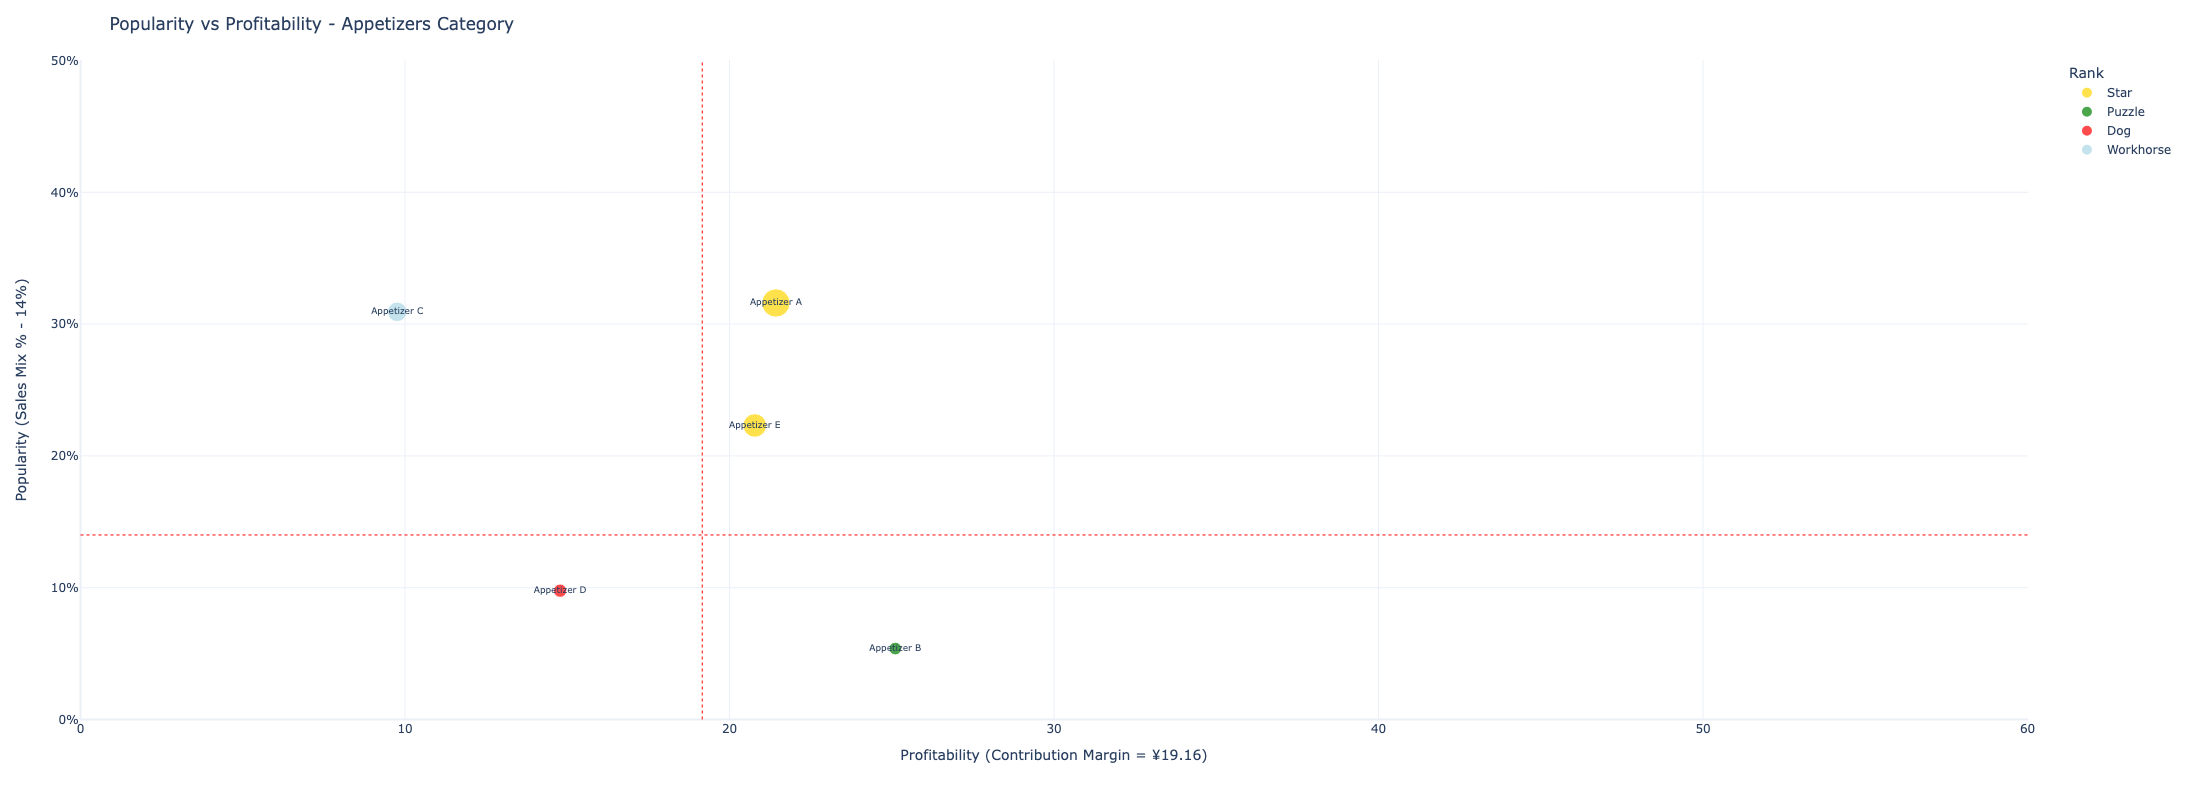

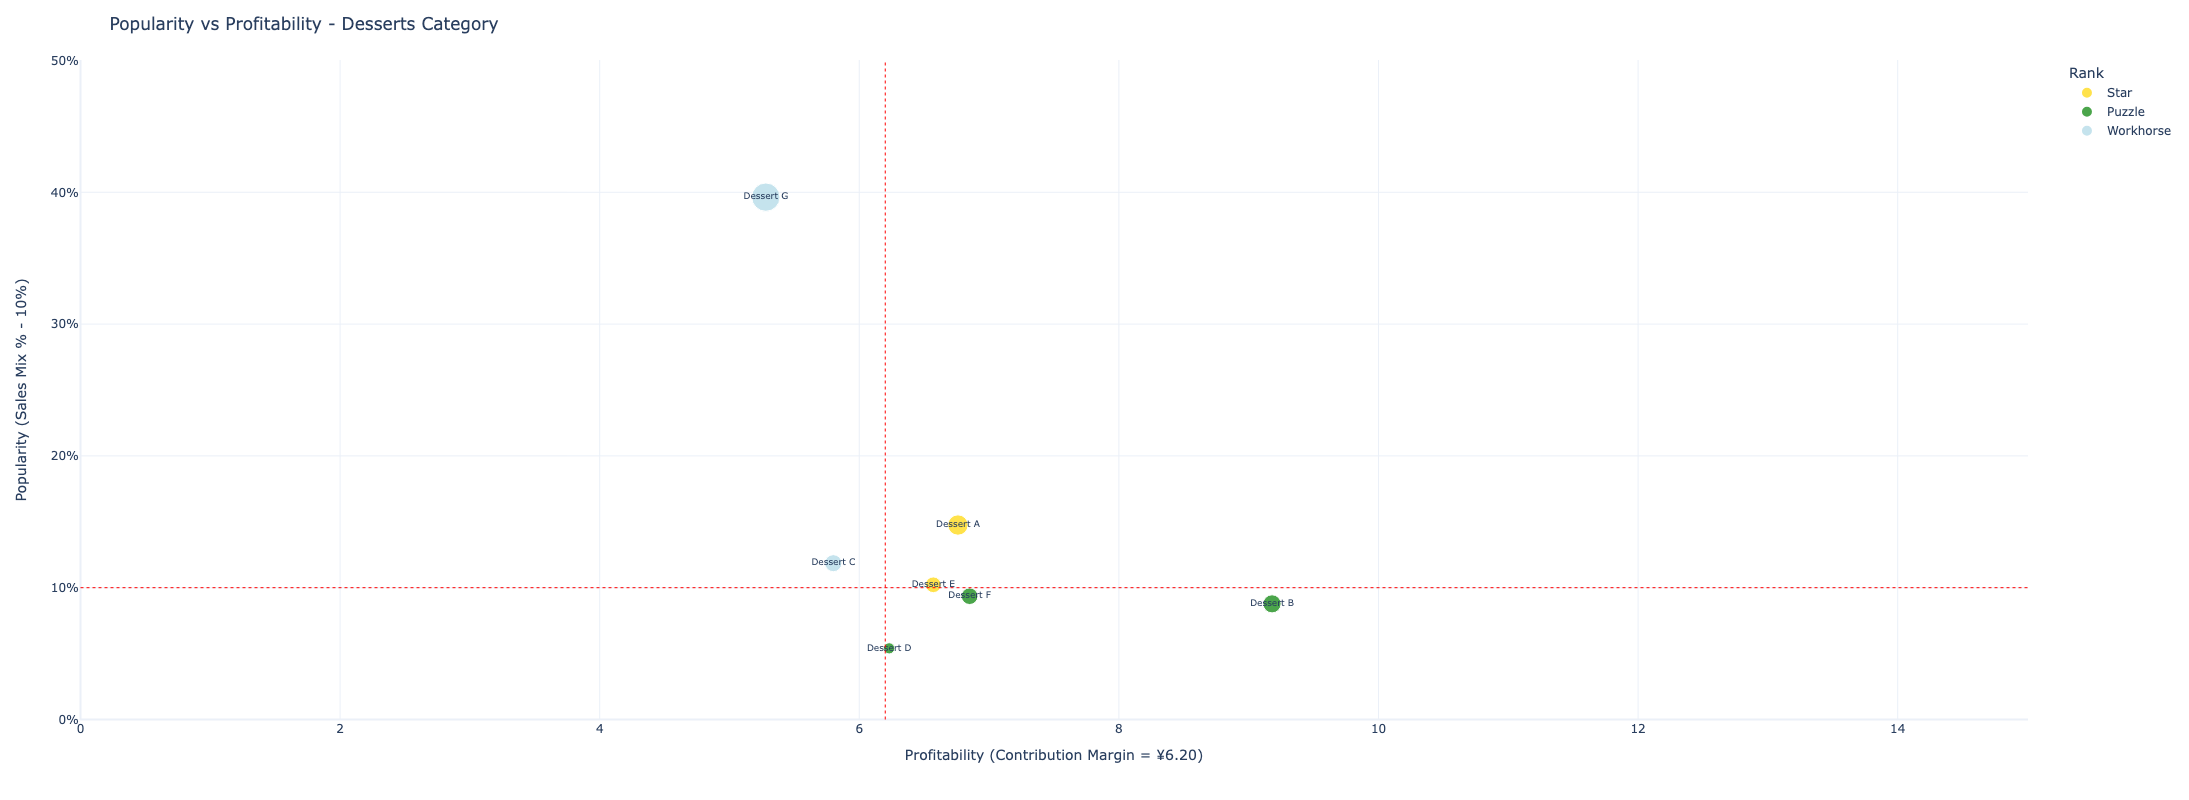

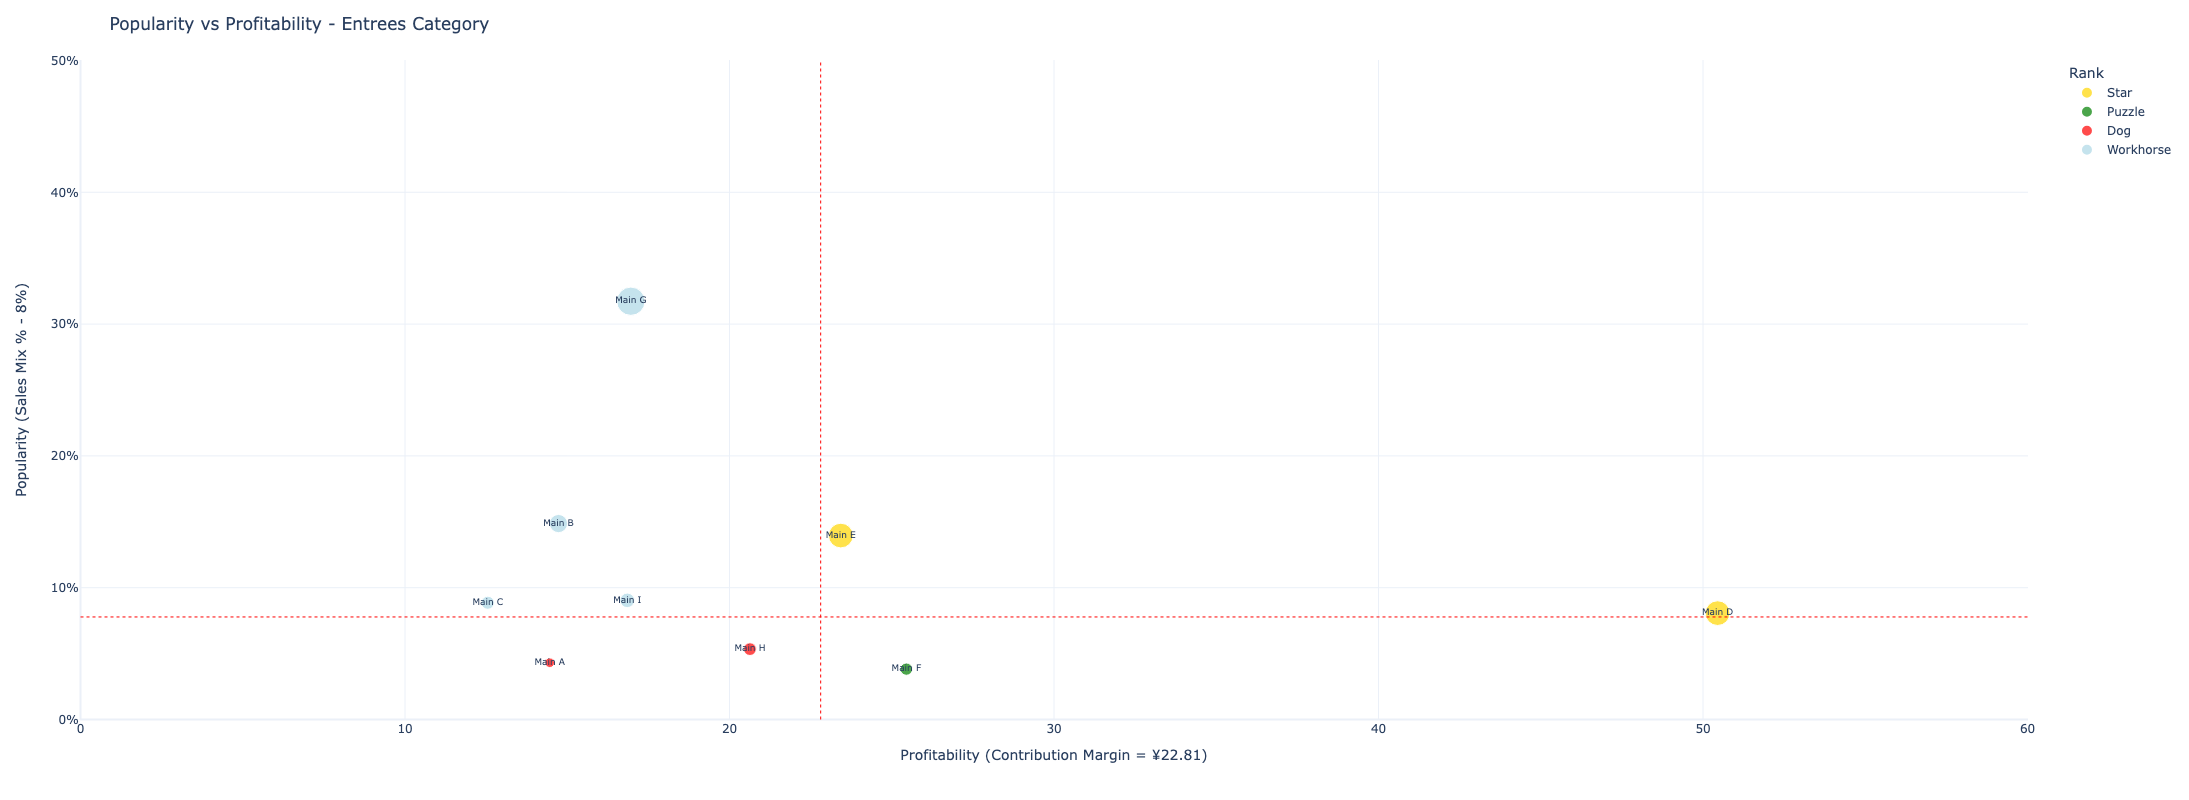

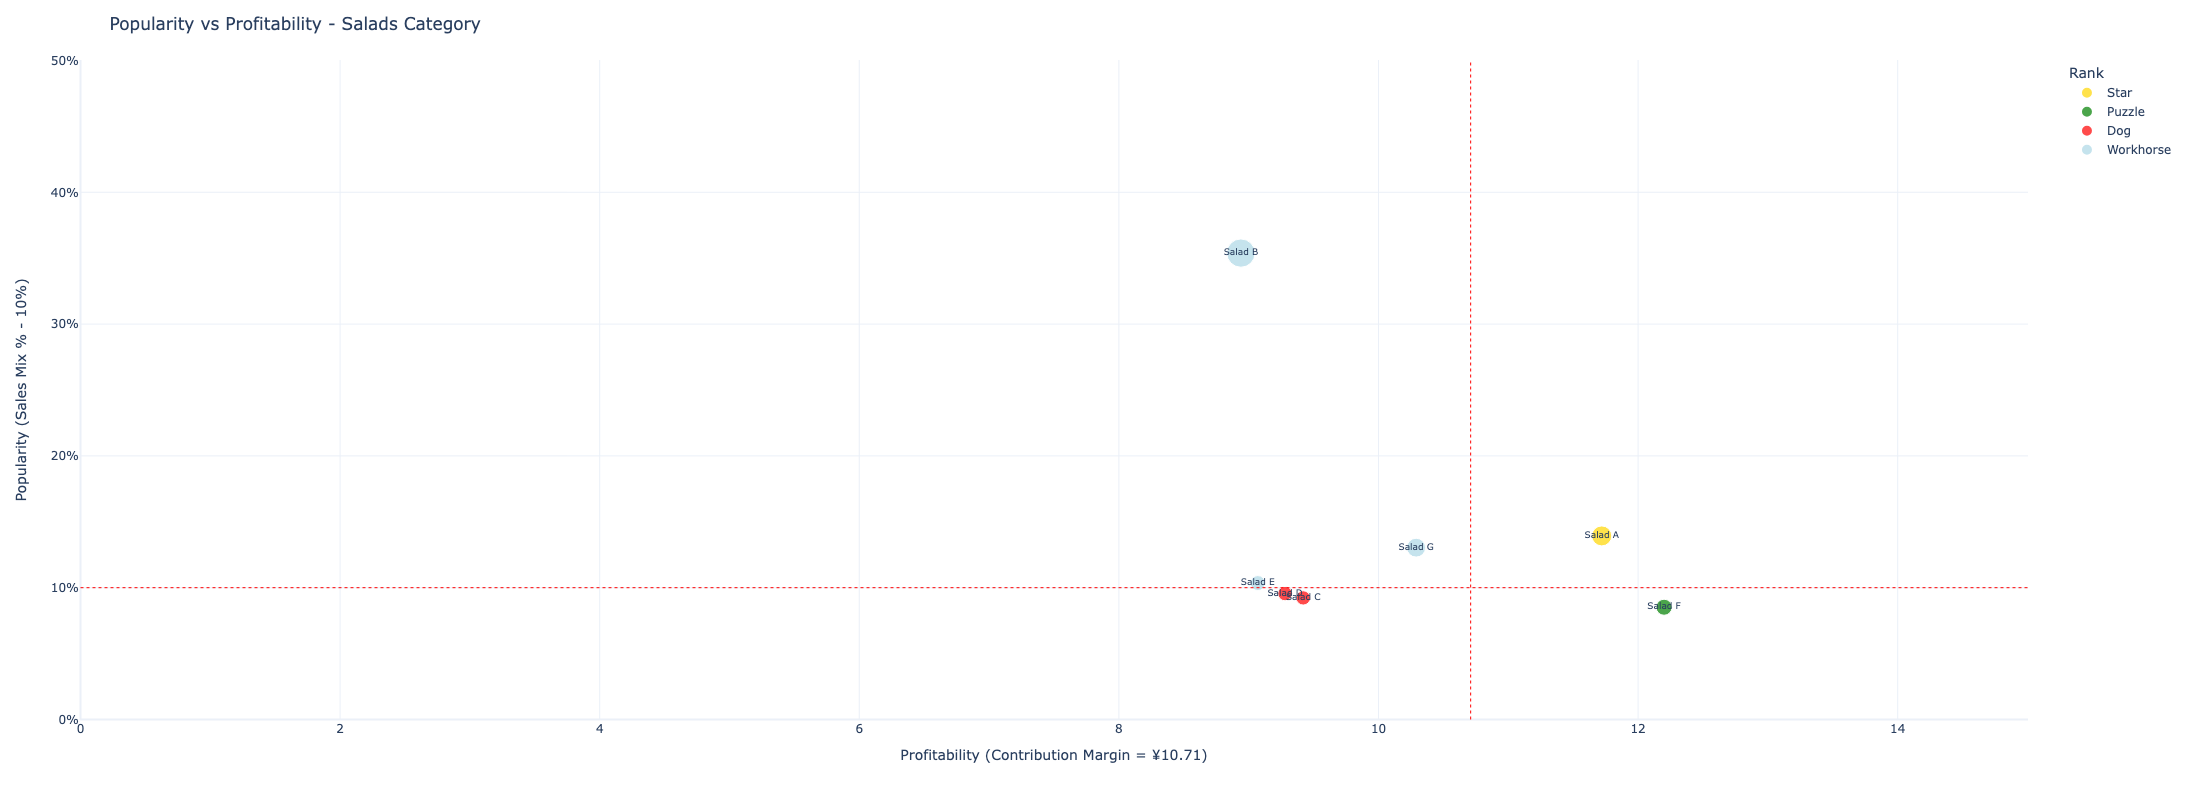

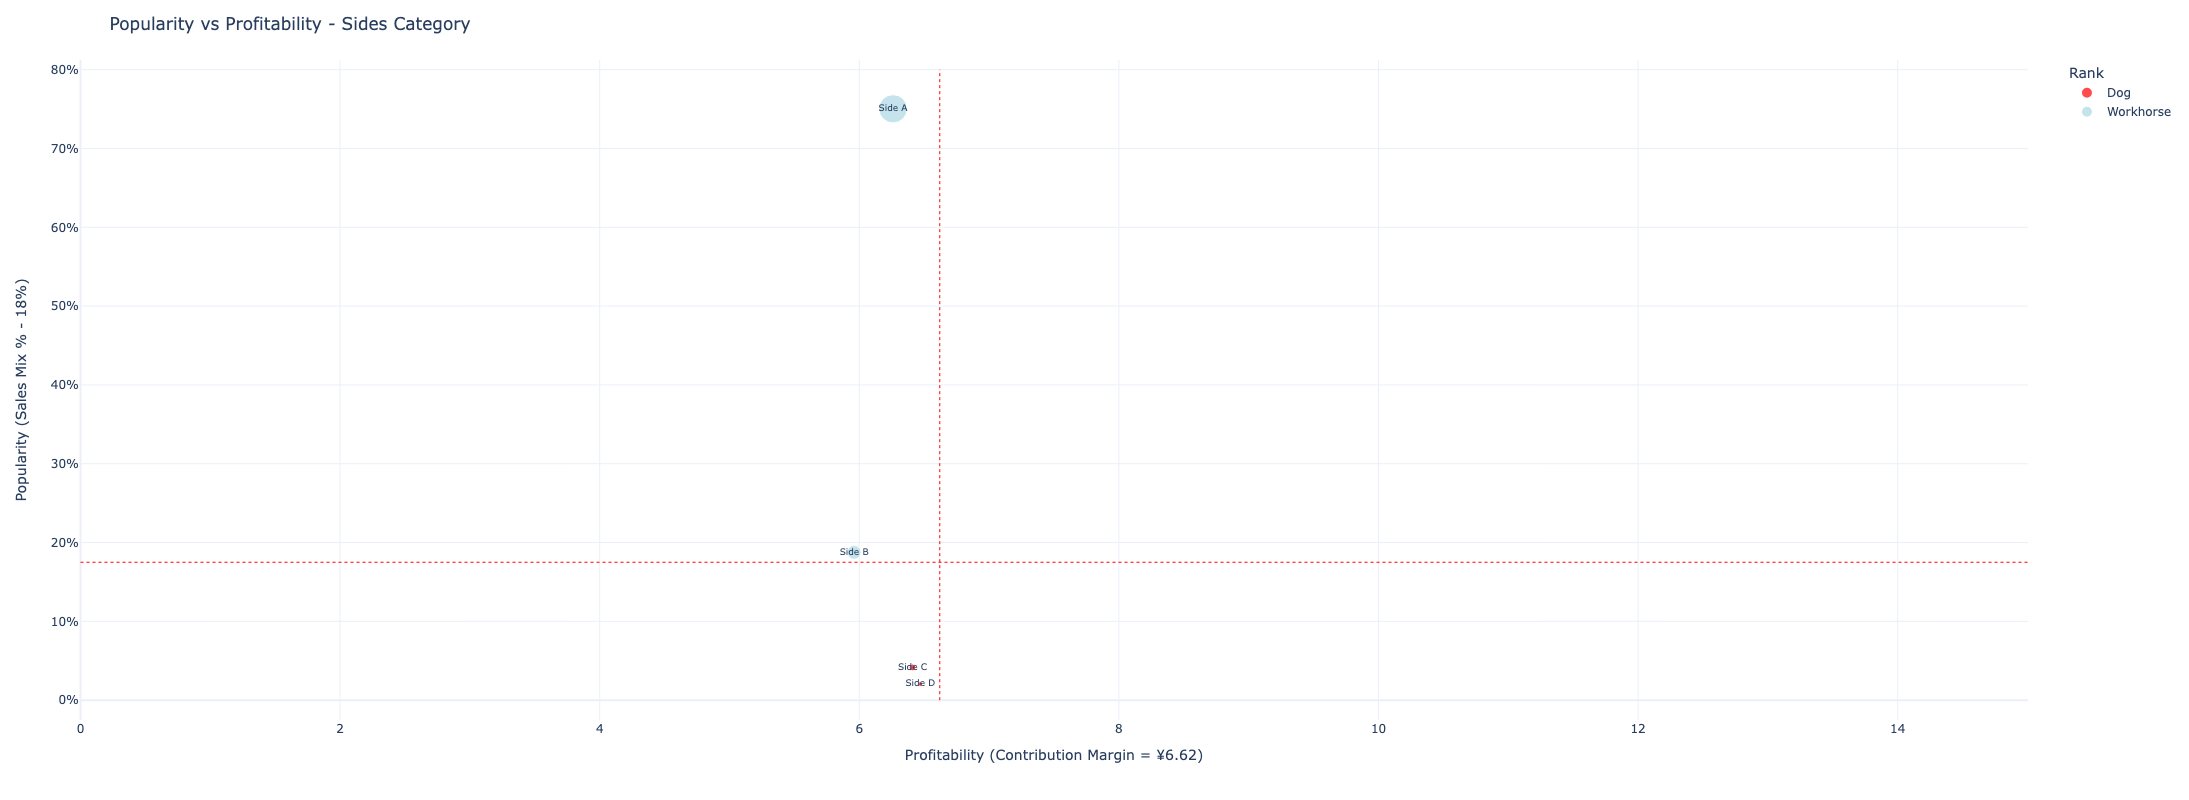

In [23]:
for cat in raw_df.menu_category.unique():
    plot_cat('sample_data.xlsx', 'full_menu', cat)